In [5]:
# imports 
from datetime import datetime
import torch
from torchvision import datasets, transforms
from torch import nn, optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [6]:
# Boiler plate stuff
transform = transforms.Compose([transforms.ToTensor()])

# Download and load the training data
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)

# Create data loaders for batching
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

def log(msg):
    right_now = datetime.now()
    msg += " " + right_now.strftime("%Y-%m-%d %H:%M:%S")
    print(msg.format(msg))

log("Boiler plate finished")

    

Boiler plate finished 2024-11-05 12:31:37


In [7]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Input layer (28x28 pixels)
        self.fc2 = nn.Linear(128, 64)       # Hidden layer
        self.fc3 = nn.Linear(64, 10)        # Output layer (10 classes for digits 0-9)

    def forward(self, x):
        x = x.view(-1, 28 * 28)            # Flatten the image
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)                    # No activation here; loss function will handle it
        
        return x
log("SimpleNN class setup finished")

SimpleNN class setup finished 2024-11-05 12:31:43


In [8]:
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

log("model finsihed")

model finsihed 2024-11-05 12:31:47


In [9]:
epochs = 5
log("this will take a moment")
for epoch in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        output = model(images)
        loss = criterion(output, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Track the loss
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}")
log("training")

this will take a moment 2024-11-05 12:31:51
Epoch 1/5, Loss: 1.7167857267073732
Epoch 2/5, Loss: 0.5666934701838473
Epoch 3/5, Loss: 0.401586881419743
Epoch 4/5, Loss: 0.35104064902326443
Epoch 5/5, Loss: 0.32167283015083403
training 2024-11-05 12:33:55


In [7]:
correct = 0
total = 0

with torch.no_grad():  # No need to track gradients for evaluation
    for images, labels in test_loader:
        output = model(images)
        _, predicted = torch.max(output, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

log("evaluate a model")

Test Accuracy: 91.02%
evaluate a model 2024-11-05 11:35:01


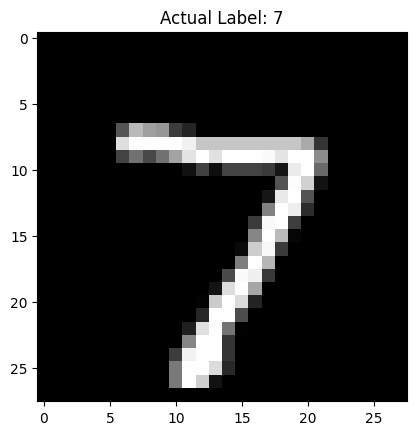

Predicted Label: 7
A single image 2024-11-05 11:36:57


In [11]:
# Get a single image and label from the test set
image, label = test_data[0]
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Actual Label: {label}")
plt.show()

# Make the prediction
with torch.no_grad():
    image = image.view(-1, 28 * 28)  # Flatten the image
    output = model(image)
    _, predicted = torch.max(output, 1)

print(f"Predicted Label: {predicted.item()}")

log("A single image")

Defaulting to user installation because normal site-packages is not writeable


In [12]:
!python -m pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----------------------- ---------------- 1.0/1.8 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 5.9 MB/s eta 0:00:00
